# A1.2 Regresión lineal simple
La felicidad no es algo fácilmente mensurable, aun así, la publicación *World Happiness Report* (WHR) ha tratado desde el 2012 de medir los niveles de felicidad de la gran mayoría de los países del mundo. Los resultados que obtienen año con año se publican de forma abierta, así como los datos que lograron capturar.  
La variable de mayor interés para este ejercicio es el nivel general de felicidad por país, evaluado en una escala del 0 al 10. Una de las variables que en dicho reporte han expuesto como relevante para determinar la felicidad de una nación es su producto interno bruto, o *gross domestic product* (GDP). Los datos de GDP por país se pueden descargar desde el sitio de *The World Bank*, una institución financiera internacional.  
En este caso, te presento un archivo de nombre `Felicidad_y_GDP.csv` (que podrás encontrar en la misma página de la plataforma donde descargaste esta plantilla), donde podrás encontrar el nivel de felicidad del último reporte del WHR (2022) y el GDP (2020) de los países para los que se cuenta con información. Los datos de niveles de felicidad se descargaron directamente del sitio de internet del __[WHR](https://worldhappiness.report/ed/2022/#appendices-and-data)__, y los datos de GDP se descargaron del sitio de internet de __[The World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)__.
La base de datos cuenta con la siguiente información: 
* `Pais`. Se describe el nombre del país. 
* `Felicidad`. Un número entre 0 y 10 que describe el nivel de felicidad. 
* `GDP`. Un número que describe el producto interno bruto.
Es momento de poner en práctica los conocimientos que hemos adquirido para encontrar un modelo de regresión lineal simple en el que relaciones la felicidad y el GDP de un país. Antes de continuar, pregúntate: ¿qué dirección crees que tendrá la asociación (a mayor GDP, mayor o menor felicidad)? 
Desarrolla los siguientes puntos en una *Jupyter Notebook*, tratando, dentro de lo posible, que cada punto se trabaje en una celda distinta. Los comentarios en el código siempre son bienvenidos, de preferencia, aprovecha el *markdown* para generar cuadros de descripción que ayuden al lector a comprender el trabajo realizado. 
1. Importa los datos del archivo `Felicidad_y_GDP.csv` a tu ambiente de trabajo. Por curiosidad, revisemos cuáles son los países más felices, así como los que tienen mayor GDP. Imprime en consola un resumen de 10 filas de la base de datos, previamente ordenada de mayor a menor felicidad. Te recomiendo que hagas uso de la función `sort_values()`, especificando como primer parámetro el nombre de la columna de interés, y el parámetro `ascending` con valor `False`. Repite el proceso, pero ahora ordenando la base de datos de mayor a menor GDP.

In [1]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
datos=ps.read_csv('Felicidad_y_GDP.csv')
(datos.head(10)).sort_values(by=['GDP'], ascending=False)

,Pais,Felicidad,GDP
4,Netherlands,7.4149,9.138650e+11
3,Switzerland,7.5116,7.522480e+11
6,Sweden,7.3843,5.414870e+11
8,Israel,7.3638,4.071010e+11
7,Norway,7.3651,3.621980e+11
1,Denmark,7.6362,3.560850e+11
0,Finland,7.8210,2.718370e+11
9,New Zealand,7.1998,2.117350e+11
5,Luxembourg,7.4040,7.335313e+10
2,Iceland,7.5575,2.171808e+10


2. Grafica las observaciones, definiendo el valor de **y** como el nivel de felicidad y el valor de **x** como el logaritmo base 10 del GDP. Típicamente, cuando trabajamos con números tan grandes como lo es el GDP, es mucho más común encontrar asociaciones con el logaritmo base 10 de la variable, que con la variable misma. Esto no es un problema, siempre y cuando nuestra conclusión incluya este recordatorio. Es decir, si descubrimos que sí existe una asociación, diríamos que: **encontramos una asociación estadísticamente significativa entre los niveles de felicidad y el logaritmo base 10 del GDP**. La librería `numpy` tiene la función `log10()`, puedes usarla para transformar el GDP.

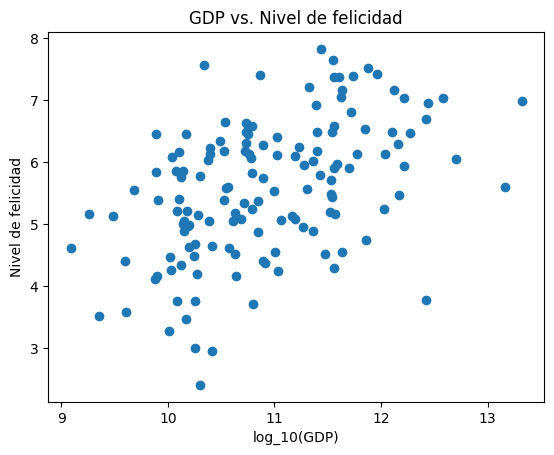

In [2]:
yDatos=datos.Felicidad
xDatos=np.log10(datos.GDP)
yMean=yDatos.mean()
xMean=xDatos.mean()
longitud=len(datos.Felicidad)
plt.scatter(xDatos, yDatos)
plt.title('GDP vs. Nivel de felicidad')
plt.xlabel("log_10(GDP)")
plt.ylabel("Nivel de felicidad")
plt.show()
%matplotlib inline

Se decidió usar `log10()` debido a que se esta trabajando con números grandes por lo mismo es más eficiente trabajar con números más pequeños, la visualización de la gráfica nos permite ver que podemos obtener la tendencia de los datos.

3. Calcula los valores óptimos de los dos coeficientes del modelo de regresión lineal simple. Realiza este proceso *a mano*, sin apoyarte con funciones preestablecidas de librerías de análisis de datos. Al finalizar, imprime en consola ambos valores. Siempre es bueno especificar qué es el valor que estamos imprimiendo, por lo que te recomiendo usar una sintaxis similar a: `print(“B1 =”, B1)`.

In [3]:
arriba=0
abajo=0
suma=0
for i in range(longitud):
    arriba=arriba+((xDatos[i]-xMean)*(yDatos[i]-yMean))
    abajo=abajo+((xDatos[i]-xMean)**2)
Bi=arriba/abajo
Bo=yMean-(Bi*(xMean))
print("B1 =", round(Bi, 4),"\tB0 =", round(Bo, 4))

B1 = 0.6281 	B0 = -1.3024


`B1` representa `m` de una función lineal **(y=mx+b)** mientras que `B0` representa `b`.

4. Realiza una nueva gráfica en la que se muestren tanto las observaciones, como la línea que representa el modelo de regresión lineal simple. Te recomiendo usar un valor de transparencia de `0.75`, tanto para las observaciones como para la línea.

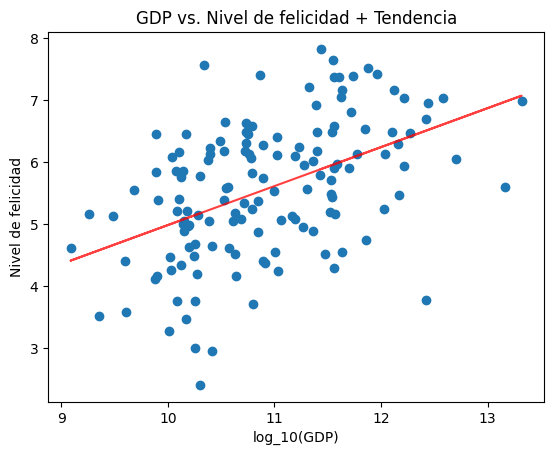

In [4]:
yEst= Bo+(Bi*xDatos)
plt.scatter(xDatos, yDatos)
plt.title('GDP vs. Nivel de felicidad + Tendencia')
plt.plot(xDatos, yEst, c="r", alpha=0.75)
plt.xlabel("log_10(GDP)")
plt.ylabel("Nivel de felicidad")
plt.show()
%matplotlib inline

Como ya tenemos los valores de `B0` y `B1`, procedemos a gratificarla junto a nuestros datos, para ver que la tandencia de nuestros datos.

5. Calcula el RSS del modelo e imprímelo en la consola.

In [5]:
rss=0
for i in range(longitud):
    rss=rss+((yDatos[i]-(Bo+(Bi*xDatos[i])))**2)
    suma=suma+((xDatos[i]-xMean)**2)
print("RSS =", round(rss, 4))

RSS = 131.3738


6. Calcula el error estándar e intervalo de confianza de 𝛽̂1, e imprime dichos valores en la consola. Siempre es bueno especificar qué es el valor que estamos imprimiendo, por lo que te recomiendo usar una sintaxis similar a: `print(“SE =”, SE)`. Asimismo, determina si la asociación entre la felicidad y el GDP es significativa en esta población, imprimiendo en consola un mensaje que claramente explique el por qué de la afirmación, evidenciado por alguna métrica calculada.

In [6]:
SEBi=sqrt(rss/(suma*(longitud-2)))
print("SE =", round(SEBi, 4), "\nIntervalo de Confianza de 𝛽̂1:\t", round(Bi, 4), " +/- ", round((0.95*SEBi), 4))

SE = 0.0998 
Intervalo de Confianza de 𝛽̂1:	 0.6281  +/-  0.0948


Para el intervalo de confianza consideraremos `p = 0.95`, de tal forma que podremos saber que tan buena es nuestra predicción.

7. Calcula el *residual standard error* y la 𝑅$^2$ del modelo, e imprime dichos valores en la consola. Para el cálculo de 𝑅$^2$, te recomiendo primero calcular el *total sum of squares*, o TSS. Para el cálculo del mismo, pon mucha atención al orden de los paréntesis, pues no es lo mismo sumar el cuadrado de múltiples valores, que sumar múltiples valores y elevar el resultado al cuadrado. Adicionalmente, agrega un comentario, imprimiéndolo en consola, sobre tu opinión del valor de 𝑅$^2$ obtenido con el modelo. 

In [7]:
t=Bi/SEBi
rse=sqrt(rss/(longitud-2))
tss=0
for i in range(longitud):
    tss=tss+((yDatos[i]-yMean)**2)
Rdos=1-(rss/tss)
print("R^2 =", round(Rdos, 4))
#   Esto me permite ver que no hay tanta correlación entre los niveles de felicidad y el GDP.

R^2 = 0.2217


𝑅$^2$ nos permite que tanta correlación tenemos en nuestra predicción, es decir que tan bien se ajusta a nuestros datos, siendo **1** un gran correlación de los datos y un **0** implica que nuestros datos no tienen correlación.

8. Finalmente, usa la función `OLS()` de la librería statsmodels.api para verificar que los resultados de todos los puntos anteriores son los esperados. Si el resumen de los resultados te entrega un ***p-value*** **= 0.000**, puedes observar el resultado con muchas más cifras significativas usando la función `pvalues` de la misma librería. **Por ejemplo:** si los resultados de ajustar el modelo los almacenaste en una variable de nombre `var`, puedes usar la siguiente sintaxis: `var.pvalues`. Por *default*, el RSE no se muestra en el resumen, para revisarlo utiliza la línea de código `print(var.scale**.5)`, de nuevo asumiendo que almacenaste el resultado en una variable de nombre `var`.

In [8]:
xData= sm.add_constant(xDatos)
modelo=sm.OLS(yDatos, xData)
var=modelo.fit()
print("p-value =",round(sqrt(var.scale), 4), "\tRSE =",round(rse, 4))
print()

p-value = 0.9722 	RSE = 0.9722



Si no usáramos las funciones de las librerías tendríamos que escribir más lineas de código lo que implica que es más fácil cometer errores, por ende llegaríamos a cometer un error al analizar nuestros datos.

**Firma de Honor:** Doy mi palabra que he realizado esta actividad con integridad académica